Digite a função a ser integrada (use 'x' como variável): 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5
Digite o valor do início do intervalo (a): 0
Digite o valor do final do intervalo (b): 0.8
Digite o número de subintervalos (n): 10
Valor aproximado da integral: 1.6150425600000093


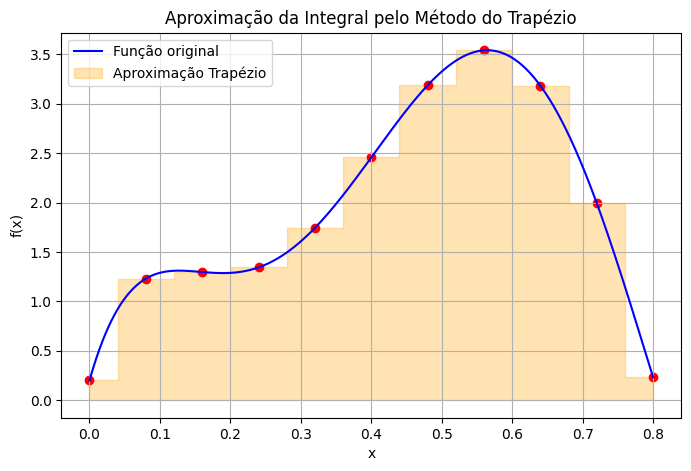

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def regra_do_trapezio_multiplos_segmentos(f, a, b, n):
    """Aplica a regra do trapézio com múltiplos segmentos."""
    x_vals = np.linspace(a, b, n + 1)
    y_vals = f(x_vals)

    h = (b - a) / n
    integral_aprox = (h / 2) * (y_vals[0] + 2 * sum(y_vals[1:n]) + y_vals[n])

    return integral_aprox, x_vals, y_vals

def gerar_grafico(f, a, b, x_vals, y_vals):
    """Gera o gráfico da função e dos trapézios utilizados na integração."""
    x_continuo = np.linspace(a, b, 1000)  # Para um gráfico suave
    y_continuo = f(x_continuo)

    plt.figure(figsize=(8, 5))
    plt.plot(x_continuo, y_continuo, 'b', label="Função original")  # Função original
    plt.fill_between(x_vals, y_vals, alpha=0.3, color='orange', step="mid", label="Aproximação Trapézio")  # Trapézios
    plt.scatter(x_vals, y_vals, color='red')  # Pontos dos trapézios

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Aproximação da Integral pelo Método do Trapézio")
    plt.legend()
    plt.grid()
    plt.show()

def solicitar_entrada():
    """Solicita os dados do usuário e executa os cálculos."""
    func_str = input("Digite a função a ser integrada (use 'x' como variável): ")
    a = input("Digite o valor do início do intervalo (a): ")
    b = input("Digite o valor do final do intervalo (b): ")
    n = int(input("Digite o número de subintervalos (n): "))

    x = sp.symbols('x')
    func_simbolica = sp.sympify(func_str)
    a, b = float(sp.sympify(a)), float(sp.sympify(b))
    f = sp.lambdify(x, func_simbolica, 'numpy')

    resultado_aproximado, x_vals, y_vals = regra_do_trapezio_multiplos_segmentos(f, a, b, n)
    print(f'Valor aproximado da integral: {resultado_aproximado}')

    gerar_grafico(f, a, b, x_vals, y_vals)

solicitar_entrada()
